# Import the necessary libraries


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-study-performance/study_performance.csv


# Load the dataset

In [2]:
data = pd.read_csv("/kaggle/input/student-study-performance/study_performance.csv")
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Exploring the data to get some initial insights.

In [3]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Check for Missing & Duplicate Values

In [4]:
missing_values = data.isnull().sum()
missing_values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
data.duplicated().sum()

0

# EDA (Exploratory data analysis)

In [6]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


****Get an average by adding all the scores.****

In [7]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average'] = data['total_score']/3
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


****Get the number of students who scored full in all subjects****

In [8]:
reading_full = data[data['reading_score'] == 100]['average'].count()
writing_full = data[data['writing_score'] == 100]['average'].count()
math_full = data[data['math_score'] == 100]['average'].count()

print(f'Number of students with full scores in Maths: {math_full}')
print(f'Number of students with full scores in Writing: {writing_full}')
print(f'Number of students with full scores in Reading: {reading_full}')

Number of students with full scores in Maths: 7
Number of students with full scores in Writing: 14
Number of students with full scores in Reading: 17


**Get the number of students who scored lessthan/equal to 20 in all subjects**

In [9]:
reading_less_20 = data[data['reading_score'] <= 20]['average'].count()
writing_less_20 = data[data['writing_score'] <= 20]['average'].count()
math_less_20 = data[data['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# Data Visualization

**Visualize gender distribution**

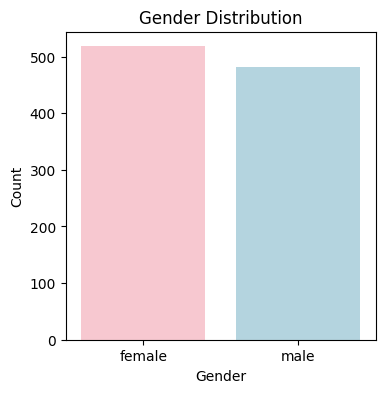

In [10]:
palette = {"male": "lightblue", "female": "pink"}
plt.figure(figsize=(4, 4))
sns.countplot(x=data['gender'], palette=palette)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Comparison of Student Scores by Gender Using Boxplots**

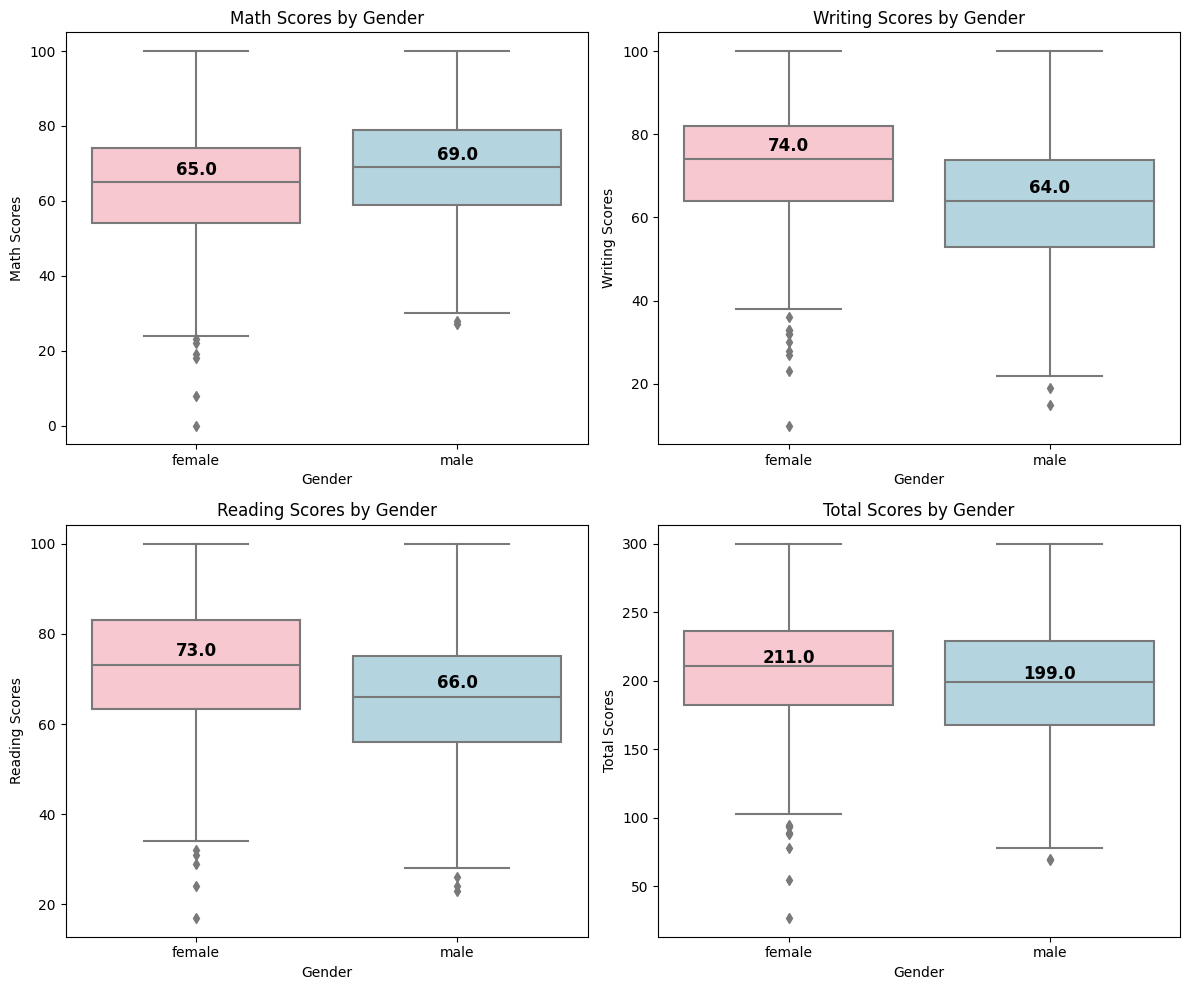

In [11]:
palette = {"male": "lightblue", "female": "pink"}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
subjects = ["math_score", "writing_score", "reading_score", "total_score"]
titles = ["Math Scores", "Writing Scores", "Reading Scores", "Total Scores"]

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(ax=ax, x='gender', y=subjects[i], data=data, palette=palette)
    ax.set_title(f"{titles[i]} by Gender")
    ax.set_xlabel("Gender")
    ax.set_ylabel(f"{titles[i]}")
    
    # Annotate median values
    medians = data.groupby("gender")[subjects[i]].median()
    for gender, median in medians.items():
        ax.text(x=["female", "male"].index(gender), y=median + 2, s=f"{median:.1f}", 
                ha='center', fontsize=12, fontweight='bold', color='black')
plt.tight_layout()
plt.show()

**Average of Math, Reading, and Writing Scores Based on Race/Ethnicity**

                math_score  reading_score  writing_score
race_ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


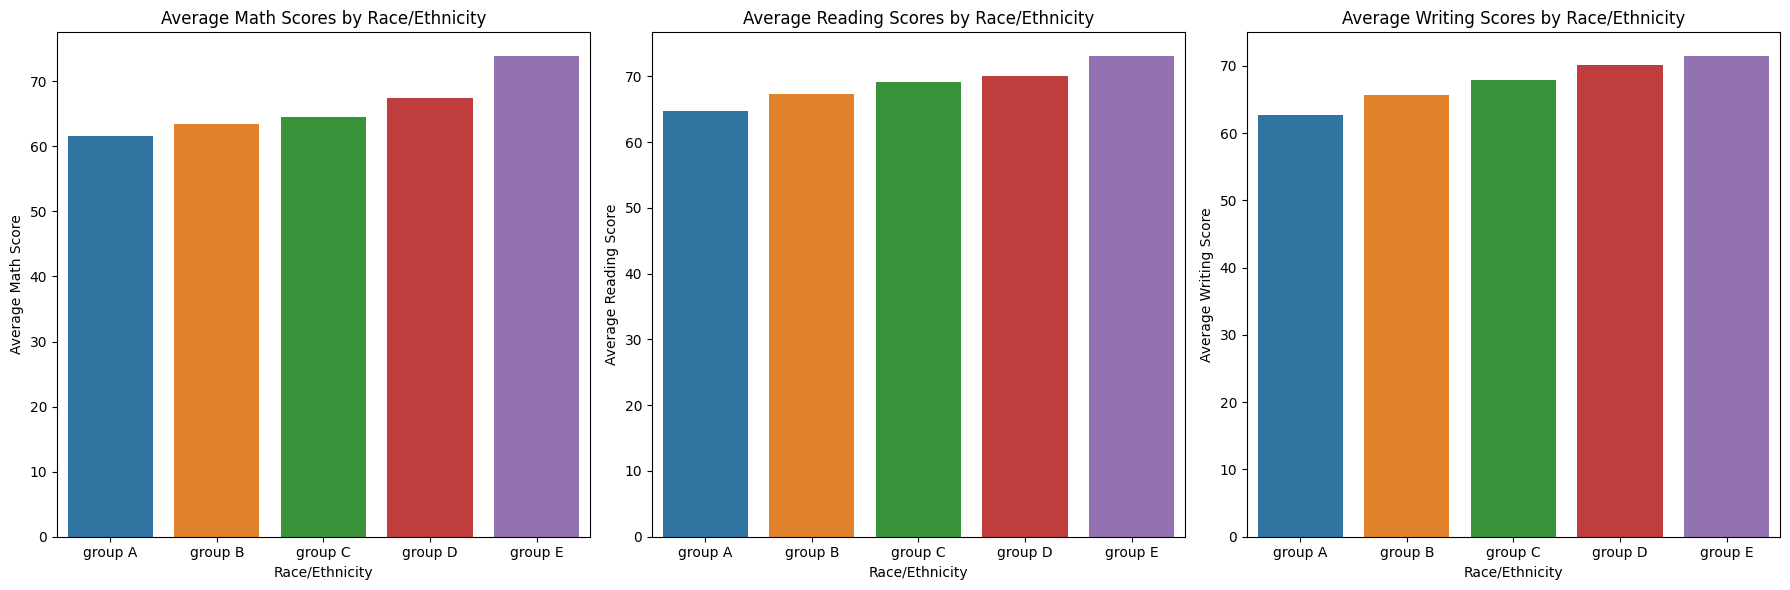

In [12]:
race_ethnicity_scores = data.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()
print(race_ethnicity_scores)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plot for Math Scores
sns.barplot(x=race_ethnicity_scores.index, y=race_ethnicity_scores['math_score'], ax=axes[0])
axes[0].set_title('Average Math Scores by Race/Ethnicity')
axes[0].set_xlabel('Race/Ethnicity')
axes[0].set_ylabel('Average Math Score')

# Plot for Reading Scores
sns.barplot(x=race_ethnicity_scores.index, y=race_ethnicity_scores['reading_score'], ax=axes[1])
axes[1].set_title('Average Reading Scores by Race/Ethnicity')
axes[1].set_xlabel('Race/Ethnicity')
axes[1].set_ylabel('Average Reading Score')

# Plot for Writing Scores
sns.barplot(x=race_ethnicity_scores.index, y=race_ethnicity_scores['writing_score'], ax=axes[2])
axes[2].set_title('Average Writing Scores by Race/Ethnicity')
axes[2].set_xlabel('Race/Ethnicity')
axes[2].set_ylabel('Average Writing Score')

plt.tight_layout()
plt.show()

****Distribution of Math, Reading, and Writing Scores Based on Lunch Status****

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

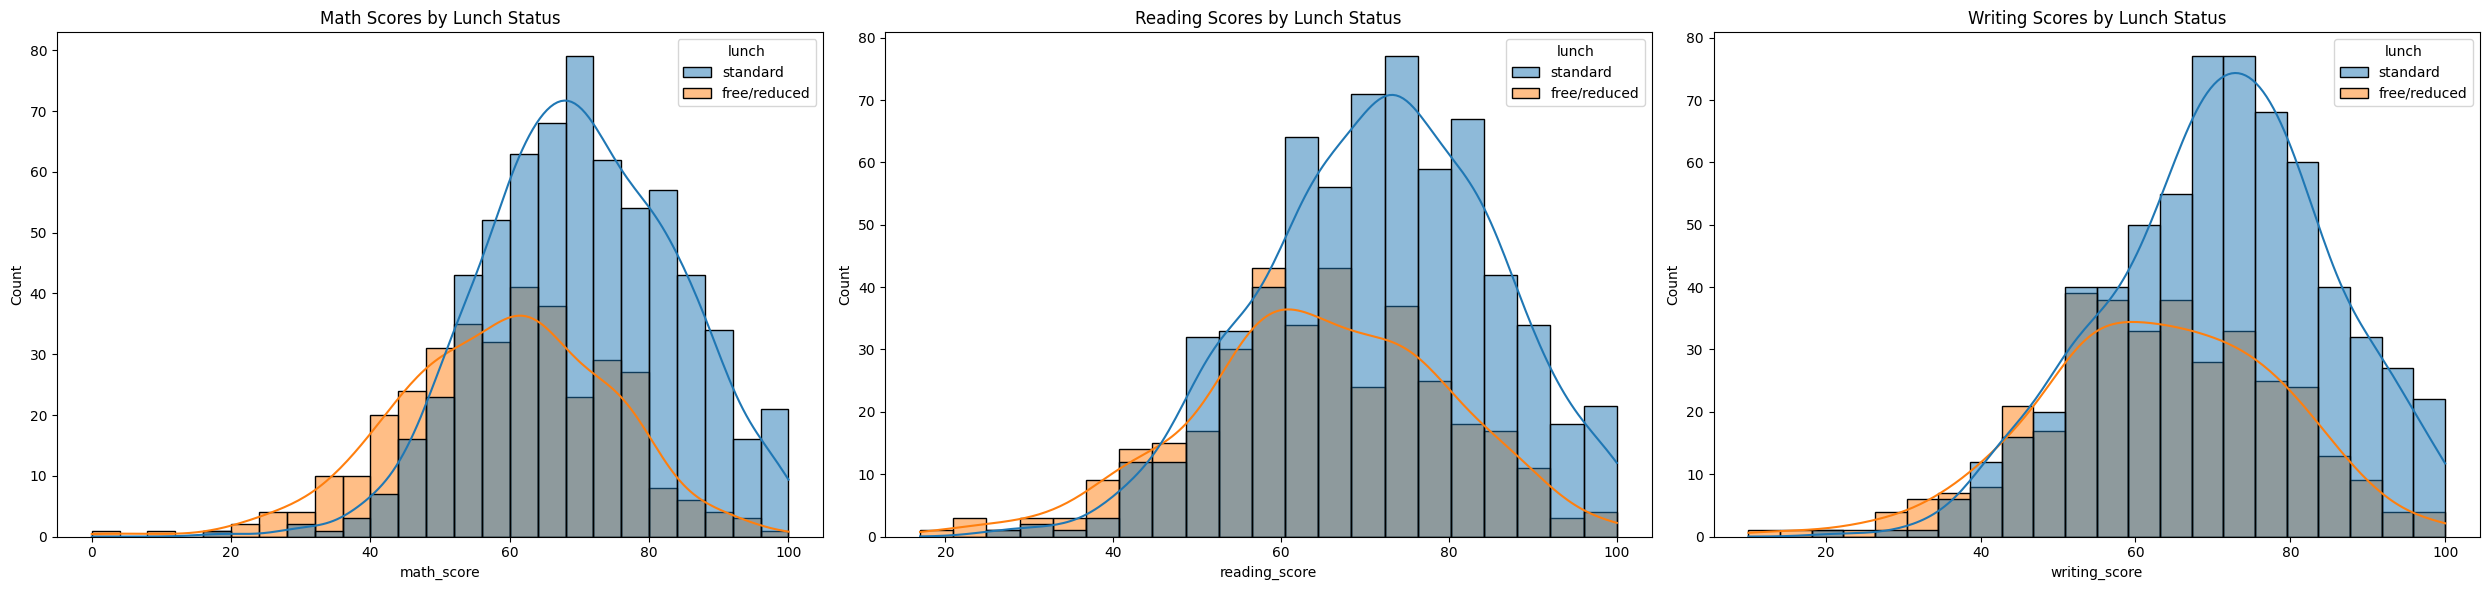

In [13]:
plt.subplots(1, 3, figsize=(25, 6))

# Math score by lunch status
plt.subplot(131)
sns.histplot(data=data, x='math_score', kde=True, hue='lunch')
plt.title('Math Scores by Lunch Status')

# Reading score by lunch status for females
plt.subplot(132)
sns.histplot(data=data, x='reading_score', kde=True, hue='lunch')
plt.title('Reading Scores by Lunch Status')

# Writing score by lunch status for males
plt.subplot(133)
sns.histplot(data=data, x='writing_score', kde=True, hue='lunch')
plt.title('Writing Scores by Lunch Status')
plt.tight_layout()
plt.show()

**Average Math, Reading, and Writing Scores by Parental Education Level**

                             math_score  reading_score  writing_score
parental_level_of_education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


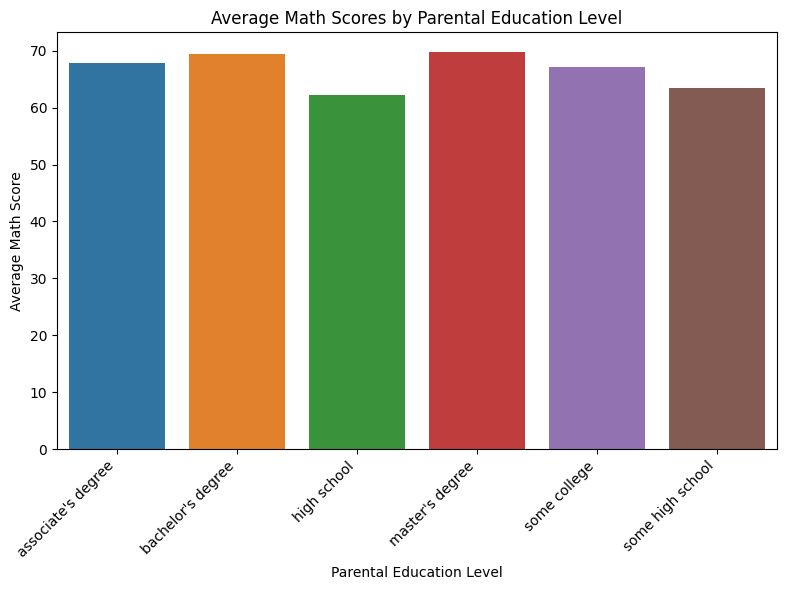

In [14]:
parental_education_scores = data.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()
print(parental_education_scores)

# Visualization of average Math scores by parental education level
plt.figure(figsize=(8, 6))
sns.barplot(x=parental_education_scores.index, y=parental_education_scores['math_score'])
plt.title('Average Math Scores by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Math Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()


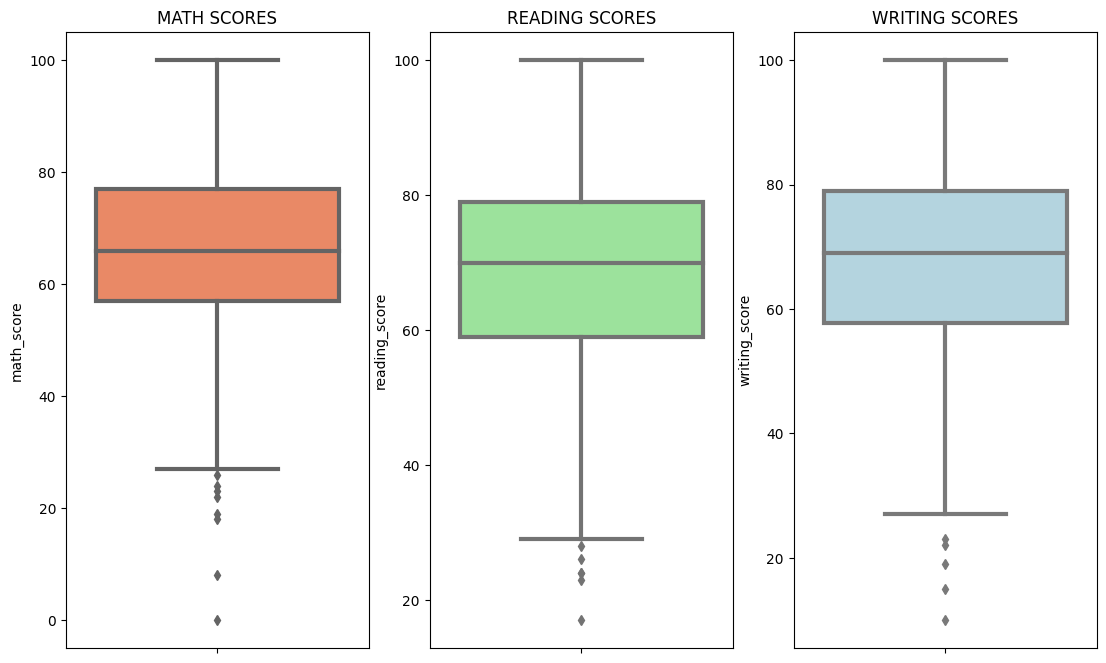

In [15]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score',data=data,color='coral',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score',data=data,color='lightgreen',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score',data=data,color='lightblue',linewidth=3)
plt.show()

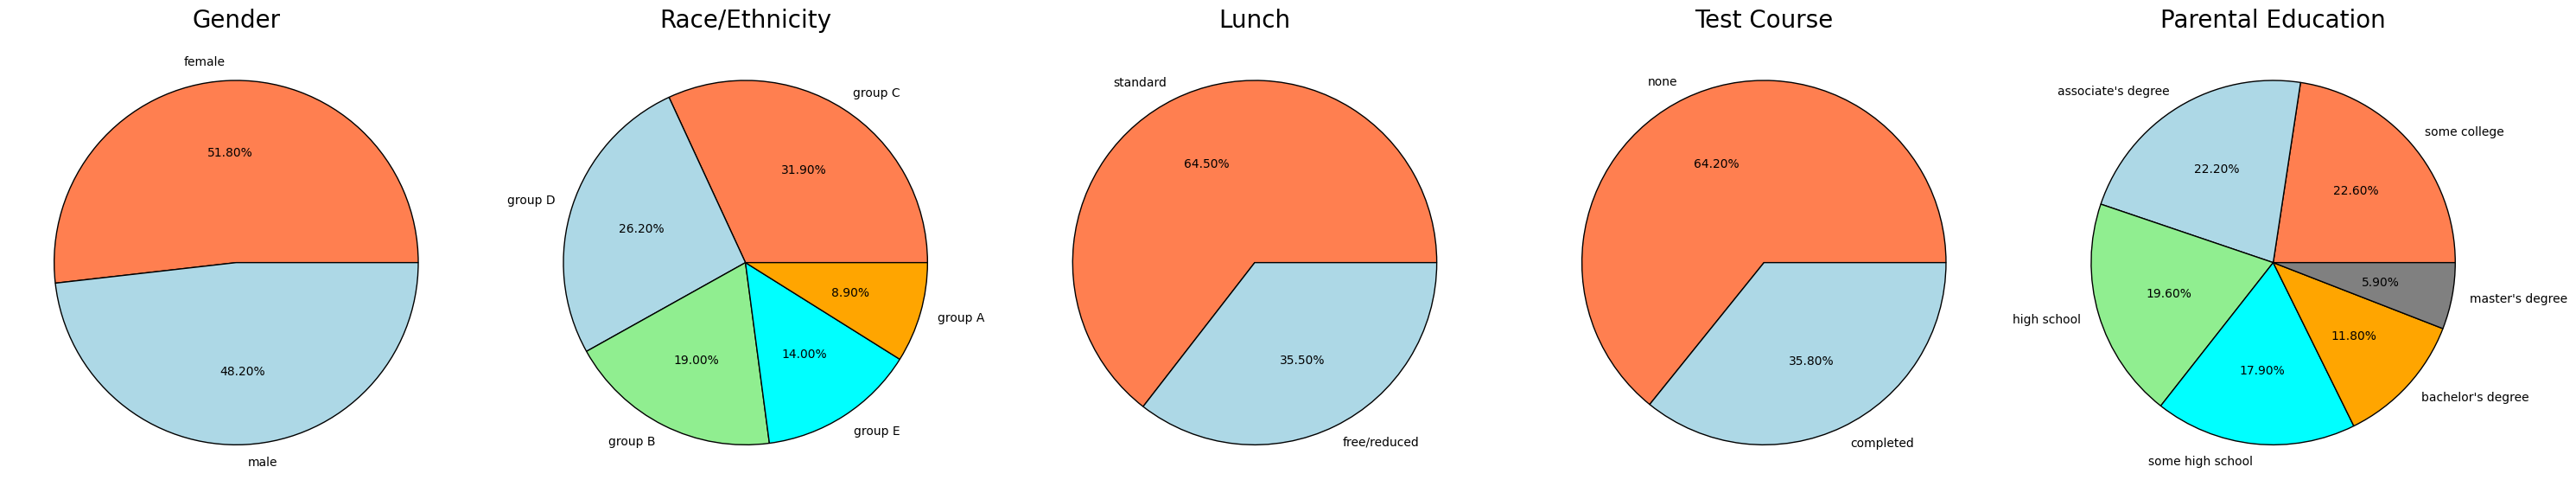

In [16]:
plt.rcParams['figure.figsize'] = (30, 12)

columns = ['gender', 'race_ethnicity', 'lunch', 'test_preparation_course', 'parental_level_of_education']
titles = ['Gender', 'Race/Ethnicity', 'Lunch', 'Test Course', 'Parental Education']
colors_list = [
    ['coral', 'lightblue'],  # Gender
    ['coral', 'lightblue', 'lightgreen', 'cyan', 'orange'],  # Race/Ethnicity
    ['coral', 'lightblue'],  # Lunch
    ['coral', 'lightblue'],  # Test Preparation Course
    ['coral', 'lightblue', 'lightgreen', 'cyan', 'orange', 'grey']  # Parental Education
]

# Create pie charts in a loop
for i, (col, title, colors) in enumerate(zip(columns, titles, colors_list), 1):
    plt.subplot(1, 5, i)
    
    size = data[col].value_counts()
    labels = size.index 

    plt.pie(size, colors=colors[:len(size)], labels=labels, autopct='%1.2f%%', 
            wedgeprops={'edgecolor': 'black'})  # Edge color for better visibility
    plt.title(title, fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()


**Calculate correlation matrix**

               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


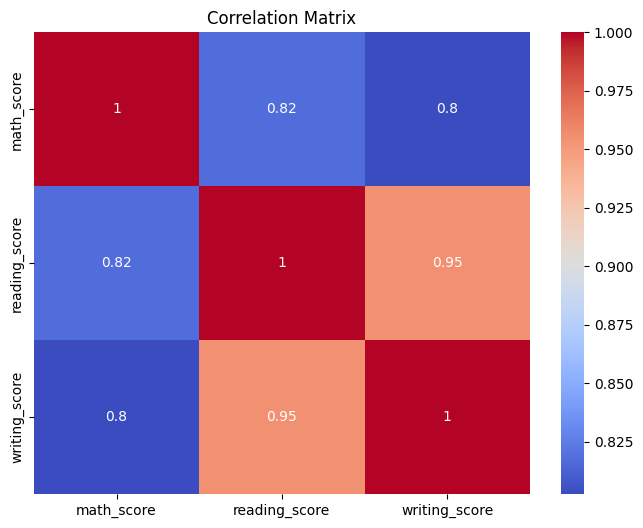

In [17]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[['math_score', 'reading_score', 'writing_score']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [18]:
# One-Hot Encoding for categorical variables
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
existing_columns = [col for col in categorical_columns if col in data.columns]
data = pd.get_dummies(data, columns=existing_columns, drop_first=True)

In [19]:
# Define features and target
X = data.drop(['math_score', 'reading_score', 'writing_score'], axis=1)
y = data[['math_score', 'reading_score', 'writing_score']]

# Split the data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training - RandomForest with Hyperparameter Tuning

In [22]:
rf = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

In [23]:
# Train Gradient Boosting for each target variable separately
gb_math = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reading = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_writing = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_math.fit(X_train, y_train['math_score'])
gb_reading.fit(X_train, y_train['reading_score'])
gb_writing.fit(X_train, y_train['writing_score'])

GradientBoostingRegressor(random_state=42)

# Make predictions

In [24]:
y_pred_rf = best_rf.predict(X_test)
y_pred_math = gb_math.predict(X_test)
y_pred_reading = gb_reading.predict(X_test)
y_pred_writing = gb_writing.predict(X_test)

# Model Evaluation

In [25]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} Performance:')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R^2 Score: {r2:.4f}\n')

evaluate_model(y_test['math_score'].values, y_pred_rf[:, 0], "RandomForest (Math)")
evaluate_model(y_test['reading_score'].values, y_pred_rf[:, 1], "RandomForest (Reading)")
evaluate_model(y_test['writing_score'].values, y_pred_rf[:, 2], "RandomForest (Writing)")
evaluate_model(y_test, y_pred_rf, "RandomForest")

RandomForest (Math) Performance:
Mean Squared Error: 19.38
R^2 Score: 0.9204

RandomForest (Reading) Performance:
Mean Squared Error: 11.79
R^2 Score: 0.9479

RandomForest (Writing) Performance:
Mean Squared Error: 12.12
R^2 Score: 0.9497

RandomForest Performance:
Mean Squared Error: 14.43
R^2 Score: 0.9393



# Visualization of Model Predictions vs Actual Student Scores

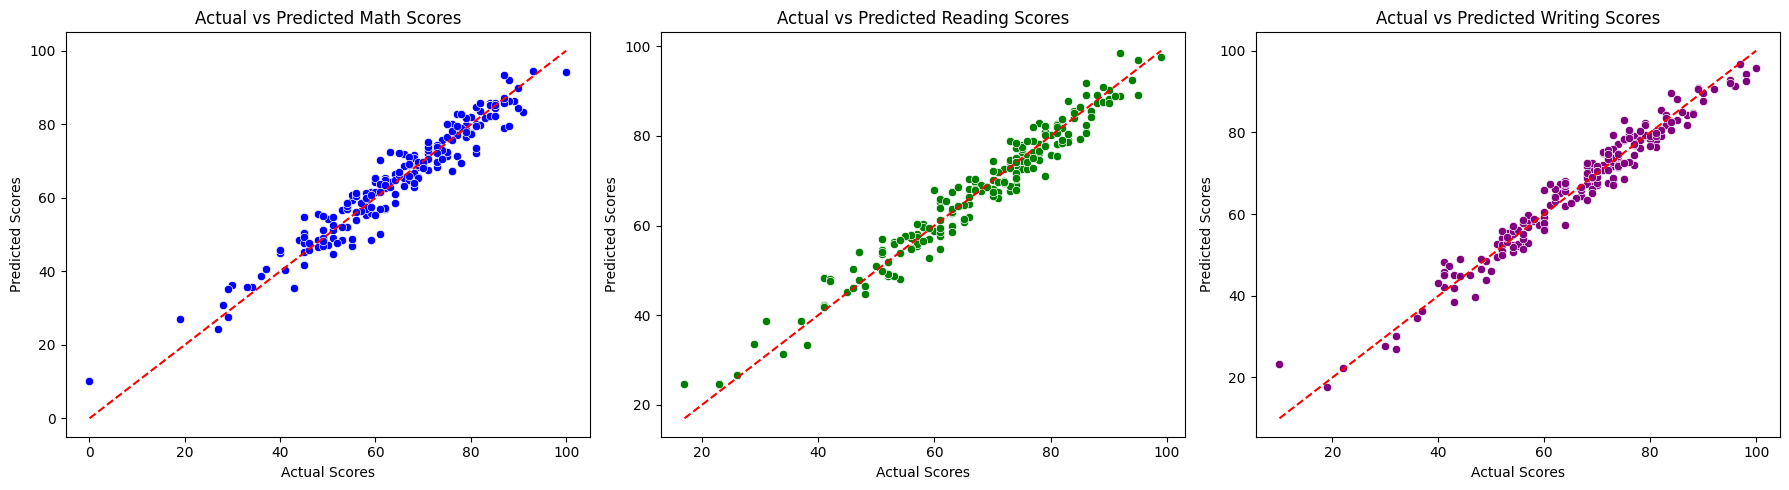

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Math Score
sns.scatterplot(x=y_test['math_score'], y=y_pred_math, ax=axes[0], color='blue')
axes[0].plot([y_test['math_score'].min(), y_test['math_score'].max()], 
             [y_test['math_score'].min(), y_test['math_score'].max()], 'r--')
axes[0].set_title('Actual vs Predicted Math Scores')
axes[0].set_xlabel('Actual Scores')
axes[0].set_ylabel('Predicted Scores')

# Reading Score
sns.scatterplot(x=y_test['reading_score'], y=y_pred_reading, ax=axes[1], color='green')
axes[1].plot([y_test['reading_score'].min(), y_test['reading_score'].max()], 
             [y_test['reading_score'].min(), y_test['reading_score'].max()], 'r--')
axes[1].set_title('Actual vs Predicted Reading Scores')
axes[1].set_xlabel('Actual Scores')
axes[1].set_ylabel('Predicted Scores')

# Writing Score
sns.scatterplot(x=y_test['writing_score'], y=y_pred_writing, ax=axes[2], color='purple')
axes[2].plot([y_test['writing_score'].min(), y_test['writing_score'].max()], 
             [y_test['writing_score'].min(), y_test['writing_score'].max()], 'r--')
axes[2].set_title('Actual vs Predicted Writing Scores')
axes[2].set_xlabel('Actual Scores')
axes[2].set_ylabel('Predicted Scores')

plt.tight_layout()
plt.show()


In [27]:
# Feature Importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importances)

Feature Importance:
 total_score                                      0.476332
average                                          0.467977
gender_male                                      0.044380
test_preparation_course_none                     0.003256
lunch_standard                                   0.002881
race_ethnicity_group C                           0.001153
race_ethnicity_group E                           0.001032
race_ethnicity_group D                           0.000827
parental_level_of_education_some college         0.000794
parental_level_of_education_high school          0.000681
race_ethnicity_group B                           0.000295
parental_level_of_education_some high school     0.000233
parental_level_of_education_bachelor's degree    0.000138
parental_level_of_education_master's degree      0.000022
dtype: float64
